In [1]:
from scipy.special import ellipe
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
donor_diam = 2
angle = 45

In [3]:
def calc_perim_total(donor_diam, angle, rounded=False):
    donor_r = donor_diam / 2
    a = donor_r
    b = donor_r / np.cos(angle * np.pi / 180)
    fish_mouth = 2 * b
    e_sq = 1.0 - b ** 2 / a ** 2
    perimeter_ellipse = 4 * a * ellipe(e_sq)
    if rounded:
        return np.round(2 * fish_mouth + perimeter_ellipse, 2)
    return 2 * fish_mouth + perimeter_ellipse

In [4]:
calc_perim_total(donor_diam, angle)

13.297249827547803

In [5]:
donor_r = donor_diam / 2
a = donor_r
b = donor_r / np.cos(angle * np.pi / 180)
fish_mouth = 2 * b

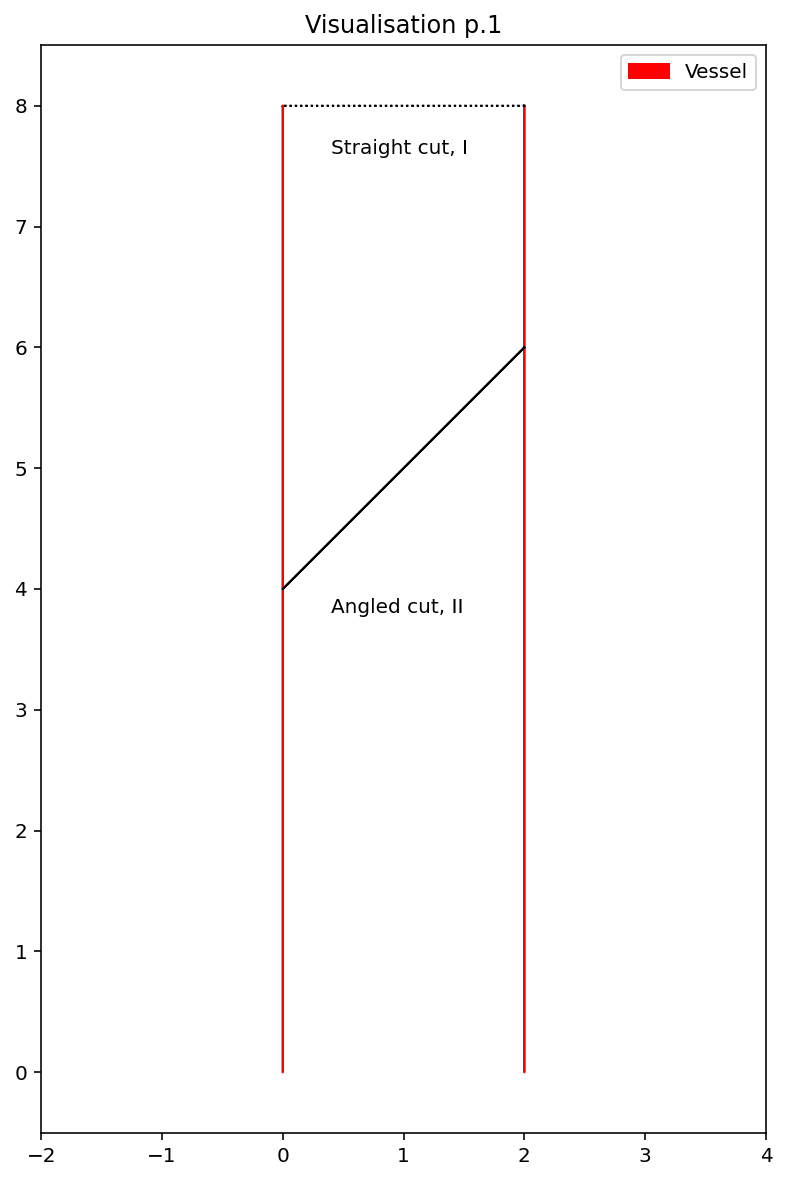

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.arrow(0, 0, 0, donor_diam * 4, color="red")
ax.arrow(donor_diam, 0, 0, donor_diam * 4, color="red", label="Vessel")
ax.arrow(0, donor_diam * 4, donor_diam, 0, linestyle=":")
ax.annotate("Straight cut, I", (donor_diam / 5, donor_diam * 3.8))
ax.arrow(0, donor_diam * 2, donor_diam, donor_diam * np.tan(angle * np.pi / 180))
ax.annotate("Angled cut, II", (donor_diam / 5, donor_diam * 1.9))
ax.set_aspect("equal")
ax.set_xlim((-donor_diam, donor_diam + donor_diam))
ax.set_ylim((-donor_diam / 4, donor_diam * 4.25))
ax.legend()
ax.set_title("Visualisation p.1")
plt.show()

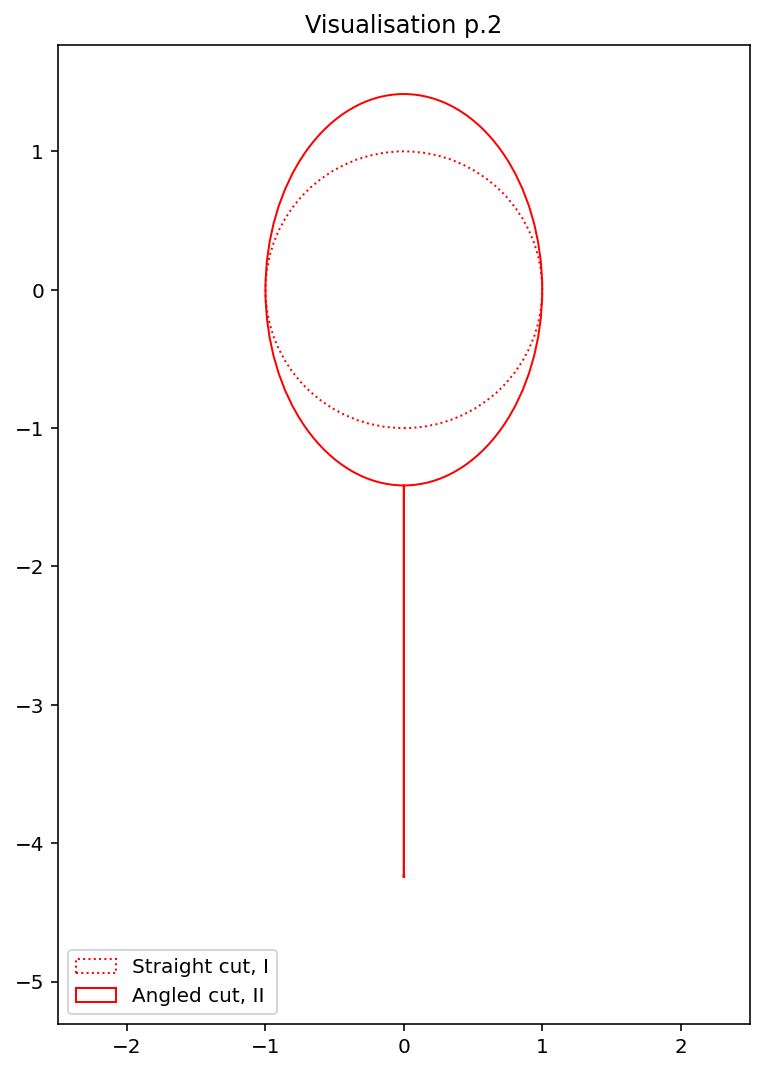

In [7]:
fig, ax = plt.subplots(figsize=(10, 9))
circle = mt.Ellipse(
    (0, 0),
    donor_diam,
    donor_diam,
    facecolor="none",
    edgecolor="red",
    label="Straight cut, I",
    linestyle=":",
)
ellipse = mt.Ellipse(
    (0, 0),
    donor_diam,
    b * 2,
    facecolor="none",
    edgecolor="red",
    label="Angled cut, II",
)
ax.arrow(0, -b, 0, -fish_mouth, color="red")
ax.add_patch(circle)
ax.add_patch(ellipse)
ax.set_aspect("equal")
ax.set_xlim((-donor_diam * 1.25, donor_diam * 1.25))
ax.set_ylim((-(b + fish_mouth) * 1.25, b * 1.25))
ax.legend()
ax.set_title("Visualisation p.2")
plt.show()

In [8]:
angles = np.linspace(45, 60, 4)
diams = np.linspace(0.5, 6, 56)

In [9]:
col_ix = pd.MultiIndex.from_product([["Angles"], [str(i) + "°" for i in angles]])
row_ix = pd.MultiIndex.from_product(
    [["Vessel diameter"], [str(round(i, 1)) + "mm" for i in diams]]
)
data = []
for i in angles:
    data.append(calc_perim_total(diams, i, rounded=True))
data = np.array(data)
df = pd.DataFrame(data=data, index=col_ix, columns=row_ix)

In [10]:
df = df.transpose()
df

Angles                     
                       45.0°  50.0°  55.0°  60.0°
Vessel diameter 0.5mm   3.32   3.59   3.94   4.42
                0.6mm   3.99   4.30   4.73   5.31
                0.7mm   4.65   5.02   5.51   6.19
                0.8mm   5.32   5.74   6.30   7.08
                0.9mm   5.98   6.46   7.09   7.96
                1.0mm   6.65   7.17   7.88   8.84
                1.1mm   7.31   7.89   8.66   9.73
                1.2mm   7.98   8.61   9.45  10.61
                1.3mm   8.64   9.33  10.24  11.50
                1.4mm   9.31  10.04  11.03  12.38
                1.5mm   9.97  10.76  11.81  13.27
                1.6mm  10.64  11.48  12.60  14.15
                1.7mm  11.30  12.20  13.39  15.04
                1.8mm  11.97  12.91  14.18  15.92
                1.9mm  12.63  13.63  14.96  16.80
                2.0mm  13.30  14.35  15.75  17.69
                2.1mm  13.96  15.06  16.54  18.57
                2.2mm  14.63  15.78  17.33  19.46
                2.3mm  15.29  16.50  18.11  20.34
                2.4mm  15.96  17.22  18.90  21.23
                2.5mm  16.62  17.93  19.69  22.11
                2.6mm  17.29  18.65  20.48  22.99
                2.7mm  17.95  19.37  21.26  23.88
                2.8mm  18.62  20.09  22.05  24.76
                2.9mm  19.28  20.80  22.84  25.65
                3.0mm  19.95  21.52  23.63  26.53
                3.1mm  20.61  22.24  24.41  27.42
                3.2mm  21.28  22.96  25.20  28.30
                3.3mm  21.94  23.67  25.99  29.19
                3.4mm  22.61  24.39  26.78  30.07
                3.5mm  23.27  25.11  27.57  30.95
                3.6mm  23.94  25.82  28.35  31.84
                3.7mm  24.60  26.54  29.14  32.72
                3.8mm  25.26  27.26  29.93  33.61
                3.9mm  25.93  27.98  30.72  34.49
                4.0mm  26.59  28.69  31.50  35.38
                4.1mm  27.26  29.41  32.29  36.26
                4.2mm  27.92  30.13  33.08  37.15
                4.3mm  28.59  30.85  33.87  38.03
                4.4mm  29.25  31.56  34.65  38.91
                4.5mm  29.92  32.28  35.44  39.80
                4.6mm  30.58  33.00  36.23  40.68
                4.7mm  31.25  33.72  37.02  41.57
                4.8mm  31.91  34.43  37.80  42.45
                4.9mm  32.58  35.15  38.59  43.34
                5.0mm  33.24  35.87  39.38  44.22
                5.1mm  33.91  36.59  40.17  45.11
                5.2mm  34.57  37.30  40.95  45.99
                5.3mm  35.24  38.02  41.74  46.87
                5.4mm  35.90  38.74  42.53  47.76
                5.5mm  36.57  39.45  43.32  48.64
                5.6mm  37.23  40.17  44.10  49.53
                5.7mm  37.90  40.89  44.89  50.41
                5.8mm  38.56  41.61  45.68  51.30
                5.9mm  39.23  42.32  46.47  52.18
                6.0mm  39.89  43.04  47.25  53.07